# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [73]:
#define bootstrap functions (from datacamp)

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [35]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [89]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Conda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


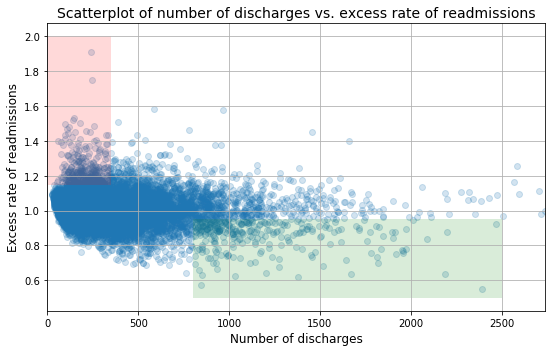

In [90]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### Question 1

The null hypothesis here would be that small hospitals do not have proportionally more readmissions than large hospitals, or rather that the mean readmission rate of the two groups is the same.

The alternate hypothesis is that small hospitals readmissions differ from large hospitals in a statistically significant way..



In [98]:
#split the discharge data by hospital size

small_hosp = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] <=100]
big_hosp = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] >= 1000]

#drop records with NaN values

small_hosp_drop = small_hosp.dropna(subset = (['Excess Readmission Ratio']))
big_hosp_drop = big_hosp.dropna(subset = (['Excess Readmission Ratio']))
hosp_drop = clean_hospital_read_df.dropna(subset = (['Excess Readmission Ratio']))

In [92]:
print ('Data for Small Hospitals:')
print ('Mean Excess Readmission Ratio: ', np.mean(small_hosp_drop['Excess Readmission Ratio']))
print ('Standard Deviation: ', np.std(small_hosp_drop['Excess Readmission Ratio']))
print ('95% Confidence Interval:', np.percentile(small_hosp_drop['Excess Readmission Ratio'], [2.5, 97.5]))
print ('Margin of Error:', 1.96 * np.std(small_hosp_drop['Excess Readmission Ratio'])/ np.sqrt(len(small_hosp_drop['Excess Readmission Ratio'])))
print('')
print('Data for Large Hospitals')
print ('Mean Excess Readmission Ratio: ', np.mean(big_hosp_drop['Excess Readmission Ratio']))
print ('Standard Deviation: ', np.std(big_hosp_drop['Excess Readmission Ratio']))
print ('95% Confidence Interval:', np.percentile(big_hosp_drop['Excess Readmission Ratio'], [2.5, 97.5]))
print ('Margin of Error:', 1.96 * np.std(big_hosp_drop['Excess Readmission Ratio'])/ np.sqrt(len(big_hosp_drop['Excess Readmission Ratio'])))

mean_diff = np.mean(small_hosp_drop['Excess Readmission Ratio'])- np.mean(big_hosp_drop['Excess Readmission Ratio'])
print('')
print('Difference in Means Betwen Small and Large Hospitals: ', mean_diff)

Data for Small Hospitals:
Mean Excess Readmission Ratio:  1.0220883892068686
Standard Deviation:  0.05813067690124139
95% Confidence Interval: [0.933725 1.129105]
Margin of Error: 0.0032579785672377285

Data for Large Hospitals
Mean Excess Readmission Ratio:  0.9783342672413797
Standard Deviation:  0.11974844021328539
95% Confidence Interval: [0.71988  1.187655]
Margin of Error: 0.010895996279774448

Difference in Means Betwen Small and Large Hospitals:  0.04375412196548889


### Question 2

In [93]:
#t-test of data sets for large and small hospitals

import scipy
from scipy import stats

difference =scipy.stats.ttest_ind(small_hosp_drop['Excess Readmission Ratio'], big_hosp_drop['Excess Readmission Ratio'])
print(difference)

Ttest_indResult(statistic=10.029895332413446, pvalue=4.9142568500221855e-23)


### Question 3

The small p-value here (α < 0.01) allows the null hypothesis that the groups have the same mean to be rejected.

### Question 4

Statistically significant differences between the large hospital and small hospital readmittances were proven to exist. To see if it is practically significant or can lead to an actionable recommendation further exploration is needed.  It is important to et a sense of how the data differs before making a recommendation.

### Question 5

The scatterplot above definitely highlights readmissions above the norm at small hospitals, but the green area fails to show a major difference in lower readmissions in the green portion, which looks roughly symmetrical to aboove normal readmissions in large hospitals.

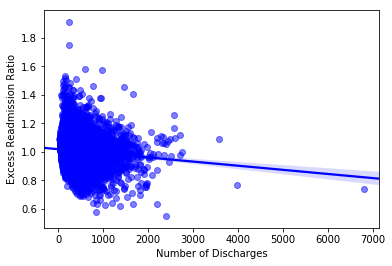

In [95]:
#plot a regression line on the data

sns.regplot(y= 'Excess Readmission Ratio' , x= 'Number of Discharges', data=clean_hospital_read_df, fit_reg = True, color = 'blue', scatter_kws={'alpha':0.5})

The regression line does show that as hospital size increases the ratio of readmissions seems to go lower.

C:\Conda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Conda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Readmissions in Large Hospitals')

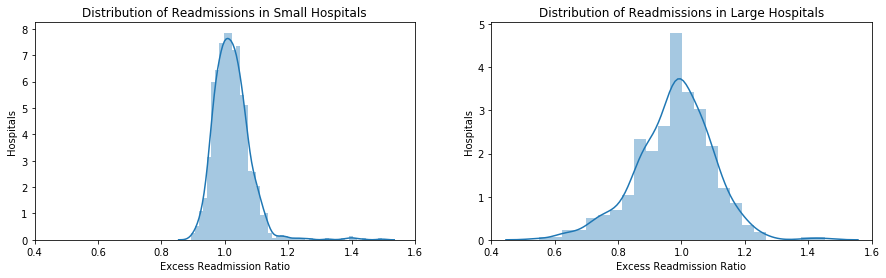

In [96]:
small_hosp_drop = small_hosp.dropna(subset = (['Excess Readmission Ratio']))
big_hosp_drop = big_hosp.dropna(subset = (['Excess Readmission Ratio']))

fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(15)

ax1 = fig.add_subplot (1,2,1)
sns.distplot(small_hosp_drop['Excess Readmission Ratio'])
plt.xlim(.4, 1.6)
plt.ylabel('Hospitals')
plt.title('Distribution of Readmissions in Small Hospitals')

ax2 = fig.add_subplot (1,2,2)
sns.distplot(big_hosp_drop['Excess Readmission Ratio'])
plt.xlim(.4, 1.6)
plt.ylabel('Hospitals')
plt.title('Distribution of Readmissions in Large Hospitals')

These 2 distributions plots are very telling. First off, while we see that the mean readmission rate is lower at large hospitals, many of the worst hospital are also large, with a greater proportion more than .2 readmissions above the norm.  We also see that no small hospital reported a readmission figure below .8.  It seems that the mean for small hospitals is higher not so much because of a great number over underperformers, but because of a lack over "overperformers" to balance them out.  It is also worth noting that if the metric for "standard" readmissions was calculated off this data set, the larger hospitals were a greater portion of this, and therefore would appear to have a more normal distribution.

Looking at the distributions of the actual readmissions, I think the recommendations that would put additional restrictions on smaller hospitals are misguided.  The truth of the matter is that because of the nature of the distributions (bounded by zero on one side and infinity on the other), the smaller hospitals show a distribution that is shifted slightly to the right.  If we look out even as far as one standard deviation above the mean, the smaller hospitals actually perform better.